# Statistik-Labor Testat Aufgabe 2
***Hinweise:***
- Bitte überprüfen Sie Ihre Resultate vor der Abgabe Ihre Ergebnisse mit den Teilergebnissen aus der Datei ***Teilergebnisse_xy.txt***.
- Die Unterlagen sind im **pdf-Format** in Moodle hochgeladen abzugeben. Richtige Lösungen werden nicht mehr an Sie zurückgegeben. Eine Abgabe per Email ist nicht möglich.
- Bitte füllen Sie das jeweilige **Deckblatt** mit aus und geben es mit Ihrer Lösung zusammen ab.

***Aufgabenstellung:***<br>
Untersuchen Sie die Bevölkerungsentwicklung der USA. <br>
In der Datei **sr_aufg_2_xy.txt** im Unterverzeichnis **Endziffer_xy** (*„xy“ steht für die beiden Endziffern Ihrer Matrikelnummer*) finden Sie die dafür erforderlichen Daten. <br>
Diese Datei enthält zwei Spalten fester Breite: Jahreszahl und Anzahl der Einwohner der USA in Millionen (zu einem festen Stichtag in dem angegebenen Jahr).

## a) Daten einlesen
Lesen Sie Daten in **Python** bzw. ein **Jupyter Notebook** ein. Speichern Sie sie in einem **Pandas DataFrame** ab.

In [1]:
import pandas as pd

data = pd.read_csv('sr_aufg_2_71.txt', sep='\s+', decimal=',', header=None, names=['Jahr', 'Einwohner'] )

data['Einwohner'] = data['Einwohner'].round(4)
data

,Jahr,Einwohner
0,1790,3.9292
1,1800,5.3085
2,1810,7.2399
3,1820,9.6385
4,1830,12.8660
5,1840,17.0695
6,1850,23.1919
7,1860,31.4433
8,1870,39.8184
9,1880,50.1892


## b) Streudiagramm erstellen
Stellen Sie die Bevölkerungsentwicklung in einem Streudiagramm dar.

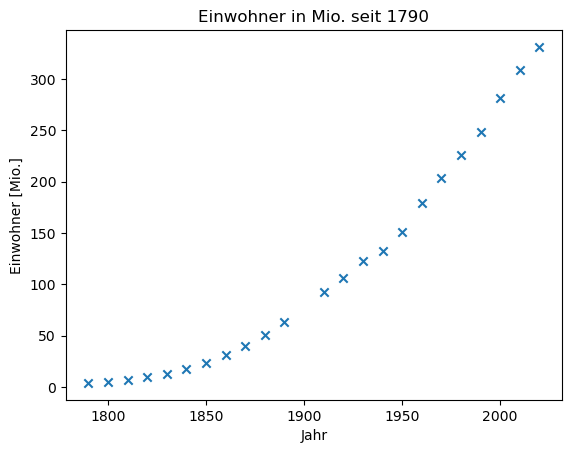

In [2]:
import matplotlib.pyplot as plt

plt.scatter(data['Jahr'], data['Einwohner'], marker='x')

plt.xlabel('Jahr')
plt.ylabel('Einwohner [Mio.]')
plt.title('Einwohner in Mio. seit 1790')

plt.show()

## c) Regressionskurven bestimmen
Untersuchen Sie je nach Matrikelnummer Ihre 5 Funktionen um eine Regressionskurve durch die Punkte zu legen:<br>

| Gerade Matrikelnummer-Endung: | Ungerade Matrikelnummer-Endung: |
| :- | :- |
| Lineare Funktion: $\;\;$ $y = ax+b$ | Lineare Funktion: $\;\;$ $y = ax+b$ |
| Polynom 2. Grades: $y = ax^2+bx+c$ | Polynom 2. Grades: $y = ax^2+bx+c$ |
| Polynom 4. Grades: $y=ax^4+bx^3+cx^2+dx+e$ | Polynom 3. Grades: $y=ax^3+bx^2+cx+d$ |
| Polynom 6. Grades: $y=ax^6+bx^5+cx^4+dx^3+gx^2+ux+v$ | Polynom 6. Grades: $y=ax^6+bx^5+cx^4+dx^3+gx^2+ux+v$ |
| Exponentialfunktion: $y=a \cdot{\rm e}^{bx}$ | Logarithmusfunktion: $y=a \cdot\ln{(x)}-b$ |

Stellen Sie **in einer Tabelle den Regressionstyp** (z.B. lineare Funktion, Polynom 2. Grades, …), die **geschätzten Koeffizienten mit Achsenabschnitt und das Bestimmtheitsmaß** dar.

***Tipp:***<br>
Verwenden Sie für die Schätzung der Regressionskurve und des Bestimmtheitsmaßes standardisierte Eingangswerte (Jahreszahlen)

In [3]:
from scipy.optimize import curve_fit
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# Daten vorbereitet
Jahre = data['Jahr'].to_numpy().reshape(-1, 1)
skalierte_Jahre = StandardScaler().fit_transform(Jahre)

# Lineare Regression
linearer_Regressor = LinearRegression()
linearer_Regressor.fit(Jahre, data['Einwohner'])
r2 = linearer_Regressor.score(Jahre, data['Einwohner'])

# Polynom Grad 2
grad_2 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(skalierte_Jahre)
poly_Regressor_2 = LinearRegression()
poly_Regressor_2.fit(grad_2, data['Einwohner'])
r2_2 = poly_Regressor_2.score(grad_2, data['Einwohner'])

# Polynom Grad 3
grad_3 = PolynomialFeatures(degree=3, include_bias=False).fit_transform(skalierte_Jahre)
poly_Regressor_3 = LinearRegression()
poly_Regressor_3.fit(grad_3, data['Einwohner'])
r2_3 = poly_Regressor_3.score(grad_3, data['Einwohner'])

# Polynom Grad 6
grad_6 = PolynomialFeatures(degree=6, include_bias=False).fit_transform(skalierte_Jahre)
poly_Regressor_6 = LinearRegression()
poly_Regressor_6.fit(grad_6, data['Einwohner'])
r2_6 = poly_Regressor_6.score(grad_6, data['Einwohner'])

# Logarithmische Funktion
def logarithmusfunktion(x, a, b):
    return a * np.log(x) - b
wert = data['Jahr'] - np.mean(data['Jahr']) / np.std(data['Jahr'])
koeffizienten_log, cov_log = curve_fit(logarithmusfunktion, wert, data['Einwohner'])
r2_log = logarithmusfunktion(wert, *koeffizienten_log)

residuen = data['Einwohner'] - r2_log
quadratsumme_residuen = np.sum(residuen**2)
quadratsumme_gesamt = np.sum((data['Einwohner'] - np.mean(data['Einwohner']))**2)
R_quadrat_log = 1 - quadratsumme_residuen / quadratsumme_gesamt

In [4]:
# Vorbereitung der Daten für die Tabelle 
tabelle = {
    'Regressionstyp': [
        'Lineare Funktion',
        'Polynom 2. Grades',
        'Polynom 3. Grades',
        'Polynom 6. Grades',
        'Logarithmische Funktion'
    ],
    'Y-Achsenabschnitt und Koeffizienten': [
        np.round(np.append(linearer_Regressor.intercept_, linearer_Regressor.coef_), 4),
        np.round(np.append(poly_Regressor_2.intercept_, poly_Regressor_2.coef_), 4),
        np.round(np.append(poly_Regressor_3.intercept_, poly_Regressor_3.coef_), 4),
        np.round(np.append(poly_Regressor_6.intercept_, poly_Regressor_6.coef_), 4),
        np.round(koeffizienten_log, 4)  # Koeffizienten der logarithmischen Funktion
    ],
    'Bestimmtheitsmaß': [
        np.round(r2, 4),
        np.round(r2_2, 4),
        np.round(r2_3, 4),
        np.round(r2_6, 4),
        np.round(R_quadrat_log, 4)
    ]
}
ergebnisse_df = pd.DataFrame(tabelle)
ergebnisse_df

,Regressionstyp,Y-Achsenabschnitt und Koeffizienten,Bestimmtheitsmaß
0,Lineare Funktion,"[-2595.7972, 1.4229]",0.9249
1,Polynom 2. Grades,"[81.5487, 100.9121, 33.587]",0.9993
2,Polynom 3. Grades,"[81.5571, 98.9221, 33.5893, 1.1558]",0.9993
3,Polynom 6. Grades,"[83.379, 95.9847, 20.8366, 5.9801, 13.7039, -1...",0.9996
4,Logarithmische Funktion,"[2657.1597, 19912.9319]",0.9162


## d) Beste Kurve wählen
Wählen Sie aus den von Ihnen untersuchten Möglichkeiten die am besten geeignete Kurve. **Erläutern** Sie Ihre Wahl.

In [5]:
# Ich habe das Polynom 2ten Grades genommen, da erstens das Bestimmtheitsmaß vom 2., 3. und 6ten Grad fast 1 annähert.
# Danach habe ich mir die Graphen mit den jeweiligen Daten angesehen und es kommt raus, dass der Graph 2ten Grades
# die Punkte erstens sehr gut mit einbezieht und es den verlauf am besten modelliert. Im Jahr 1940 und 1950 stagnieren die Werte
# und gleichen sich danach wieder aus. Es könnte ein Fehler der Werte gewesen sein oder was RUPARTIGES ist passiert.
# Während dem Krieg kann es sein, dass die Bevölkerungsrate in Amerika gesunken ist, worduch es zu solchen Werten gekommen ist.
# Dennoch soll eine Vorhersage getroffen werden für zukünftige Werte und wir gehen davon hinaus, dass kein Krieg mehr kommt,
# wofür das 2. Polynom dann sehr passend ist.

## e) Streudiagramm mit Regressionskurve
Zeichnen Sie in das Streudiagramm die optimale Regressionskurve aus 4) ein. Dabei sollen auf der x-Achse die Jahreszahlen und auf der y-Achse die Bevölkerungszahl angegeben sein.

Text(0.5, 1.0, 'Einwohner in Mio. seit 1790')

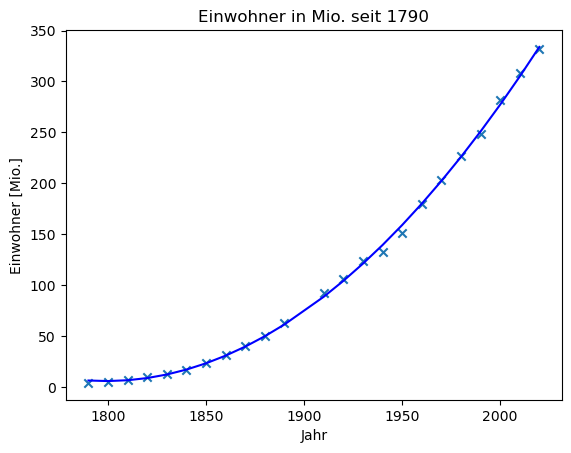

In [6]:
df = pd.DataFrame(data)
X = df[['Jahr']]
y = df['Einwohner']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Polynom 2. Grades
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_2 = poly_features.fit_transform(X_scaled)
model_poly_2 = LinearRegression()
model_poly_2.fit(X_poly_2, y)
y_pred_poly_2 = model_poly_2.predict(X_poly_2)

# Lineare Regression mit skalierten Daten
linearer_Regressor.fit(skalierte_Jahre, data['Einwohner'])
r2_linear = linearer_Regressor.score(skalierte_Jahre, data['Einwohner'])

plt.scatter(data['Jahr'], data['Einwohner'], marker='x')
plt.plot(data['Jahr'], y_pred_poly_2, label='Polynom 2. Grades', color='blue')

plt.xlabel('Jahr')
plt.ylabel('Einwohner [Mio.]')
plt.title('Einwohner in Mio. seit 1790')

## f) Prognose für das Jahr 2030
Berechnen Sie aus den Ihnen vorgelegten Daten eine Prognose über die Bevölkerungszahl der USA im Jahr 2030. **Erläutern** Sie Ihr Vorgehen.

***Tipp:***<br>
Beim Wert für die Prognose sollten Sie überlegen, ob Ihr Wert stimmen kann oder ob er nicht vielleicht völlig unrealistisch ist. <br>
Der Grund für unrealistische Werte ist dabei evtl. gar nicht in der Wahl der Regressionsvariante zu suchen, sondern evtl. darin, dass numerische Probleme vorliegen und die geschätzten Koeffizienten mit zu wenigen Nachkommastellen verwendet werden!

In [7]:
def calculate_2030_poly_2(x, a0, a1, a2):
    return a0 + a1 * x + a2 * x**2

# polynomial 2
poly_2_2030 = np.round(calculate_2030_poly_2((2030-np.mean(data['Jahr']))/np.std(data['Jahr']), poly_Regressor_2.intercept_, *poly_Regressor_2.coef_), 4)
print("Einwohner im Jahr 2030:", poly_2_2030, "Mio")


Einwohner im Jahr 2030: 364.2662 Mio


In [8]:
# Jahr 2030 standardisiert (2030-Mittelwert aller jahre, dann dividiert mit Standartabweichung von 1790-2020)
# poly_Regressor_2.intercept_ ist der Wert der y-Achse, also a0
# *poly_Regressor_2.coef_ sind dann die ermittelten Koeffizienten a1 und a2

#Dann wird das in das Polynom 2ten Grades reingetan und der prognostizierte Wert für 2023 ausgegeben.